In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing tools
from sklearn.model_selection import train_test_split

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
# create a dummy data from numpy arrays
X = np.arange(-500, 500, 5)
y = X + 10

In [3]:
X, y

(array([-500, -495, -490, -485, -480, -475, -470, -465, -460, -455, -450,
        -445, -440, -435, -430, -425, -420, -415, -410, -405, -400, -395,
        -390, -385, -380, -375, -370, -365, -360, -355, -350, -345, -340,
        -335, -330, -325, -320, -315, -310, -305, -300, -295, -290, -285,
        -280, -275, -270, -265, -260, -255, -250, -245, -240, -235, -230,
        -225, -220, -215, -210, -205, -200, -195, -190, -185, -180, -175,
        -170, -165, -160, -155, -150, -145, -140, -135, -130, -125, -120,
        -115, -110, -105, -100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,
         -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,
          -5,    0,    5,   10,   15,   20,   25,   30,   35,   40,   45,
          50,   55,   60,   65,   70,   75,   80,   85,   90,   95,  100,
         105,  110,  115,  120,  125,  130,  135,  140,  145,  150,  155,
         160,  165,  170,  175,  180,  185,  190,  195,  200,  205,  210,
         215,  220,  225,  230,  235, 

In [4]:
X.shape

(200,)

[Text(0.5, 1.0, 'Visualization of Data')]

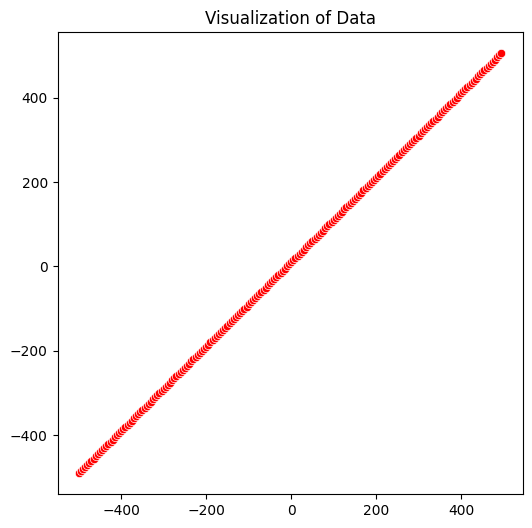

In [5]:
# visualizing the data
plt.figure(figsize =(6,6))
sns.scatterplot(x=X, y=y, c='r').set(title="Visualization of Data")

In [6]:
# convert the data to tensors
X = tf.constant(X)
y = tf.constant(y)

Text(0, 0.5, 'y')

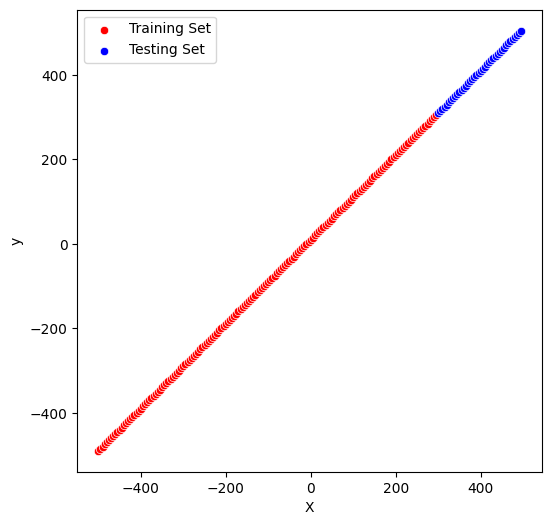

In [7]:
# plitting the data into training and testing sets
X_train, X_test = X[:160], X[160:]
y_train, y_test = y[:160], y[160:]

# Visualize the training and testing sets
plt.figure(figsize = (6,6))
sns.scatterplot(x=X_train, y=y_train, c='r', label = "Training Set")
sns.scatterplot(x=X_test, y=y_test, c='b', label= "Testing Set")
plt.xlabel("X")
plt.ylabel("y")

## Building model and increasing complexity as we move forward
1. Model_1: one output layer with default learning_rate
2. Model_2 one hidden layer with 10 neurons(relu activation) and one output layer with one neuron
3. Model_3: three hidden layers with 50, 30 and 10 neurons respectively, one output layer with one neuron
4. Model_4: 5 hidden layers 100 neurons first two and 20 next two and 10 last one (Adam optimizer))

In [8]:
# lets get a function to plot the training, test and predictions of the model
def plot_predictions(X_train, y_train, X_test, y_test, predictions):
    """
    This function plots a scatterplot of the traning and testing data, and the predictions
    made by the model when tested on the test data
    """
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=X_train, y=y_train, c='r', label='Training Set')
    sns.scatterplot(x=X_test, y=y_test, c='b', label='Testing set')
    sns.scatterplot(x=y_test, y=tf.squeeze(predictions), c='y', label='predictions')

In [9]:
# set random seed
tf.random.set_seed(42)
# Building model one
model_1 = Sequential([
    Dense(1, input_shape=[1], name='output_layer')
], name='model_1')

# compile the model
model_1.compile(
    loss = 'mae', 
    optimizer=optimizers.SGD(),
    metrics = ['mae', 'mse']
)

# fit model on the training set
model_1.fit(X_train, 
            y_train, 
            epochs=100)
# get summary
model_1.summary()

Epoch 1/100


C:\Users\HP\anaconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 235.5357 - mae: 235.5357 - mse: 93362.5391  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 272.4084 - mae: 272.4084 - mse: 114211.8281 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 238.9347 - mae: 238.9347 - mse: 94164.0234 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 270.8355 - mae: 270.8355 - mse: 112791.8438 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240.5047 - mae: 240.5047 - mse: 94610.8359  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 269.2626 - mae: 269.2626 - mse: 111420.3984 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 242.0767 - mae: 242.0767 - mse: 95106.1875  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 269.2622 - mae: 269.2622 - mse: 111420.0547  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 242.0769 - mae: 242.0769 - mse: 95106.3047  
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 269.2618 - mae: 269.2618 - mse: 1114

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output_layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [10]:
# evaluate model on test set
model_1.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 455.4098 - mae: 455.4098 - mse: 211322.2969 


[463.00909423828125, 463.00909423828125, 218705.828125]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


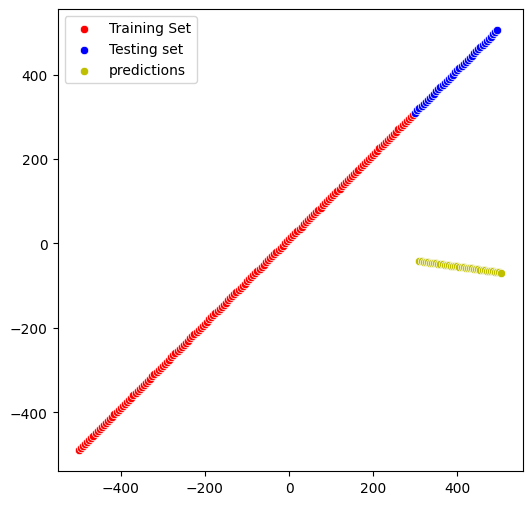

In [11]:
# let's make some predictions with the model and visualize them
y_pred = model_1.predict(X_test)

# call the plot predictions function
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [12]:
# Get the metrics and print them
mae_1 = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mse_1 = tf.metrics.mse(y_test, tf.squeeze(y_pred))

print(f"MAE: {mae_1}\nMSE: {mse_1}")

MAE: 463.00909423828125
MSE: 218705.828125


# Model 2
Model_2 one hidden layer with 10 neurons(relu activation) and one output layer with one neuron))

In [14]:
# set a random seed
tf.random.set_seed(42)
# build model 2
model_2 = Sequential([
    Dense(10, input_shape=[1], name='hidden_layer', activation='relu'),
    Dense(1, name='output_layer')
], name='model_2')

# lets compile the model
model_2.compile(
    loss = 'mae',
    optimizer = optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae', 'mse']
)

# lets fit the model with same number of epochs as the first
model_2.fit(X_train, y_train,
          epochs = 100, verbose=2)

# Get summary of the model
model_2.summary()

C:\Users\HP\anaconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 - 2s - 363ms/step - loss: 221.5800 - mae: 221.5800 - mse: 81291.0859
Epoch 2/100
5/5 - 0s - 13ms/step - loss: 198.2788 - mae: 198.2788 - mse: 72054.2109
Epoch 3/100
5/5 - 0s - 10ms/step - loss: 176.3088 - mae: 176.3088 - mse: 63998.8047
Epoch 4/100
5/5 - 0s - 10ms/step - loss: 168.9538 - mae: 168.9538 - mse: 56742.9062
Epoch 5/100
5/5 - 0s - 9ms/step - loss: 154.1464 - mae: 154.1464 - mse: 48832.4688
Epoch 6/100
5/5 - 0s - 9ms/step - loss: 140.1593 - mae: 140.1593 - mse: 40614.7383
Epoch 7/100
5/5 - 0s - 10ms/step - loss: 124.1982 - mae: 124.1982 - mse: 32132.8652
Epoch 8/100
5/5 - 0s - 9ms/step - loss: 105.8806 - mae: 105.8806 - mse: 23595.4883
Epoch 9/100
5/5 - 0s - 9ms/step - loss: 85.0778 - mae: 85.0778 - mse: 15404.7471
Epoch 10/100
5/5 - 0s - 10ms/step - loss: 61.5642 - mae: 61.5642 - mse: 8186.9268
Epoch 11/100
5/5 - 0s - 13ms/step - loss: 35.4110 - mae: 35.4110 - mse: 2779.5708
Epoch 12/100
5/5 - 0s - 9ms/step - loss: 10.5840 - mae: 10.5840 - mse: 247.5921
Epoch

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [15]:
# evaluate on the test data
model_2.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7303 - mae: 1.7303 - mse: 3.0719 


[1.7641693353652954, 1.7641693353652954, 3.198329448699951]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


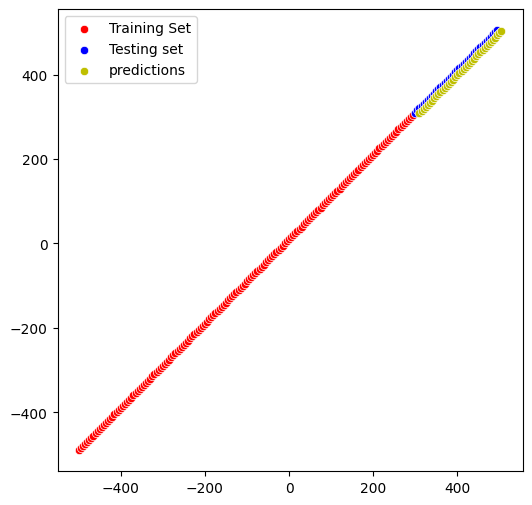

In [16]:
# Let's visualize the mode's predictions
y_pred_2 = model_2.predict(X_test)

# plot the model's predictions
plot_predictions(X_train, y_train, X_test, y_test, y_pred_2)

In [17]:
# lets get the metrics on the test and predictions
mae_2 = tf.metrics.mae(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mse(y_test, tf.squeeze(y_pred_2))
print(f"Model_2 metrics\nMSE: {mse_2}\nMAE: {mae_2}")

Model_2 metrics
MSE: 3.198329448699951
MAE: 1.7641693353652954


## Model_3: 
three hidden layers with 50, 30 and 10 neurons respectively, one output layer with one neuron

In [18]:
# set a random seed
tf.random.set_seed(42)
# build model 2
model_3 = Sequential([
    Dense(50, input_shape=[1], name='hidden_layer', activation='relu'),
    Dense(30, name='hidden_layer_2', activation='relu'),
    Dense(10, name='hidden_layer_3', activation='relu'),
    Dense(1, name='output_layer')
], name='model_3')

# lets compile the model
model_3.compile(
    loss = 'mae',
    optimizer = optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae', 'mse']
)

# lets fit the model with same number of epochs as the first
model_3.fit(X_train, y_train,
          epochs = 90, verbose=1)

# Get summary of the model
model_3.summary()

C:\Users\HP\anaconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 197.0940 - mae: 197.0940 - mse: 55675.9688
Epoch 2/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.8906 - mae: 92.8906 - mse: 14892.2246   
Epoch 3/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.2273 - mae: 39.2273 - mse: 2053.5034 
Epoch 4/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6833 - mae: 21.6833 - mse: 748.3667 
Epoch 5/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9465 - mae: 14.9465 - mse: 275.6378 
Epoch 6/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6073 - mae: 17.6073 - mse: 501.0499 
Epoch 7/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5260 - mae: 15.5260 - mse: 323.7130 
Epoch 8/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.2000 - mae: 13.2000 - mse: 294.7415 
Epoch 9/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4601 - mae: 13.4601 - mse: 269.5887 
Epoch 10/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.3993 - mae: 10.3993 - mse: 201.5161 
Epoch 11/90
5/5 ━━━━━━━━━━━━━━━

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,855 (22.88 KB)

 Trainable params: 1,951 (7.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,904 (15.25 KB)

In [19]:
# let's evaluate the model
model_3.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.5314 - mae: 11.5314 - mse: 135.3402 


[11.718042373657227, 11.718042373657227, 139.92230224609375]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000230CF6FD5A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


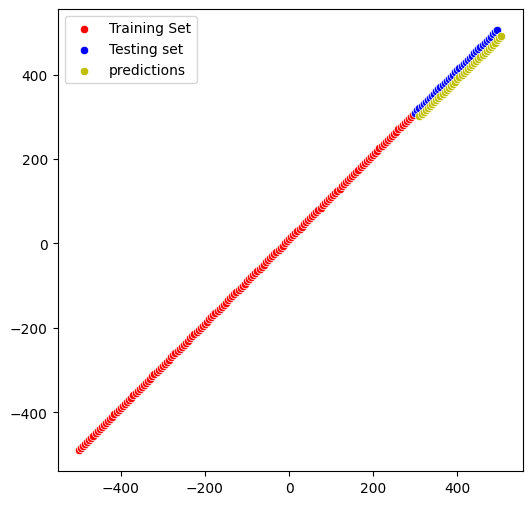

In [20]:
# make predictions with model 3 and plot the preditions
y_pred_3 = model_3.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_pred_3)

Model_4: 5 hidden layers 100 neurons first two and 20 next two and 10 last one (Adam optimizer))